# Исследование объявлений о продаже квартир

В распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открытие файла с данными и изучение общей информации. 

#### Изучение информации

In [ ]:
import pandas as pd # импортируем библиотеку pandas
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  # загружаем данные из файла в датафрейм (разделитель '\t')
print(data.head(5)) # выводим первые 5 строк датафрейма

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

Исходя из выведенных данных, можно увидеть, что датафрейм содержить 22 столбца. Предполагаем, что присутствует большое количество пропусков значений в столбце 'is_apartment' отвечающего за булев тип определения апартаментов. 

In [ ]:
data.info() # выводим общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В датафрейме 23699 строки. 
<br> Столбцы 'last_price', 'total_area', 'ceiling_height',  'floors_total', 'living_area', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest',  'days_exposition' - имеют вещественный тип данных float64. </br>
<br> Столбцы 'total_images', 'rooms', 'floor' - имеют целочисленный тип данных int64 </br>
<br> Столбцы 'first_day_exposition', 'is_apartment', 'locality_name' - имеют тип данных object </br>
<br> Столбцы 'studio', 'open_plan' - имеют булев тип данных.
<br> <b> Значениям в некоторых столбцах призвоен неправильный тип данных. </b> </br>
<br> <b> Много пропущенных значений в столбцах ponds_nearest, parks_nearest, balcony, is_apartment </b> </br>

#### Построение гистограмм

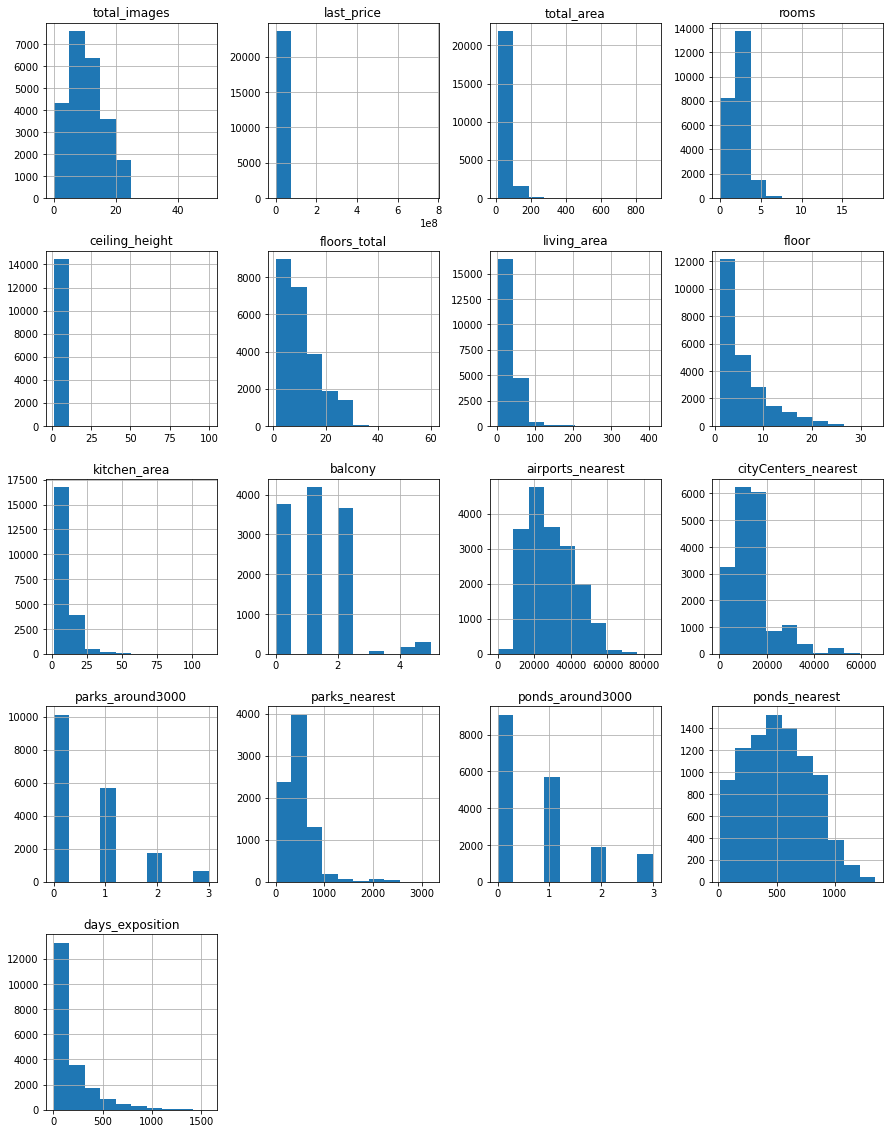

In [ ]:
data.hist(figsize=(15, 20)) # построим общую гистограмму для всех числовых значений датафрейма
plt.show()

На гистограммах видно, что в столбцах 'balcony', 'parks_around3000', 'ponds_around3000', 'floors_total', 'is_apartment', 'balcony', 'first_day_exposition', 'days_exposition' значения имеют неправильный тип данных. 
<br> В столбце 'last_price' все квартиры имеют практически одинаковую последнюю цену. Вероятно, проблема  в формате данных. </br> 

### Предобработка данных

#### Работа с пропущенными значениями

В первую очередь, обработаем пропущенные значения в необходимых столбцах. 

In [ ]:
print('Пропуски до обработки:', data['ceiling_height'].isna().sum()) # выведем количество пропусков столбца ceiling_height
print('Медиана:', data['ceiling_height'].median())
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) # заполним пропуски медианым значением
print('Пропуски после обработки:', data['ceiling_height'].isna().sum()) # выводим количество пропусков после обработки

Пропуски до обработки: 9195
Медиана: 2.65
Пропуски после обработки: 0


В столбце ceiling_height представлена информация о высоте потолков в квартирах. Пропущенные значения можно заполнить медианным значением, т.к. таким образом будет минимизировано влияние статистических выбросов и отстутсвует зависимость от других переменных.

Пропуски в столбце living_area (жилая площадь) необходимо заполнить с помощью группировки, т.к. есть зависимость от количества комнат в квартире.

In [ ]:
data['rooms'].unique() # выведем уникальные значения в столбце rooms

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Можно увидеть, что некоторые строки заполнены нулевым значением комнат. Также, некоторые квартиры имею нереально большое количество комнат. Наиболее вероятно, это статистические выбросы. 

In [ ]:
data.loc[data['rooms']>10, 'rooms'].count() #посчитаем количество квартир с аномально большим количеством комнат

8

Всего 8 квартир имеют больше 10 комнат. При группировке, данные значения можно не учитывать. 

In [ ]:
for rooms in data.loc[data['rooms']<10,'rooms'].unique(): # переберем все значения количества комнат до 7
    median = data.loc[data['rooms'] == rooms, 'living_area'].median() # найдем медианное значение для каждой группировки
    data.loc[(data['living_area'].isna()) & (data['rooms'] == rooms), 'living_area'] = median # заполним пропуски
    
print('Количество пропусков после изменения:', data['living_area'].isna().sum())

Количество пропусков после изменения: 0


Узнаем, какое количество комнат у квартир, где не заполнена площадь кухни

In [ ]:
print(data.loc[data['kitchen_area'].isna(), 'rooms'].unique())

[3 1 2 0 4 7 5 6 8 9]


Однозначно определить, почему в некоторых квартирах не заполнена площадь кухни по количеству комнат не удается. Можно предположить, что отсутствие данных о площади кухни связано с квартирами, где комнаты сопряжены с кухней и площадь комнаты уже учитывает площадь кухни. 
<br> Заполним пропуски в значениях нулевыми значениями </br>

In [ ]:
data['kitchen_area'] = data['kitchen_area'].fillna(0) # заполним пустые значения
print(data['kitchen_area'].isna().sum()) # выведем количество пропусков на экран

0


Большое количество пропусков в столбце is_apartment 
<br> Выведем 10 первых строк где обозначены квартиры, которые имеют статус апартаментов. </br>

In [ ]:
print(data.loc[data['is_apartment']==True].head(10))

      total_images  last_price  total_area first_day_exposition  rooms  \
543             11  12790000.0        56.6  2018-11-06T00:00:00      2   
916             11   8183000.0        70.0  2018-01-11T00:00:00      2   
1109             1  34878556.0        95.8  2014-12-09T00:00:00      2   
1608            12   2150000.0        20.1  2019-01-30T00:00:00      1   
2759            11   7500000.0       152.0  2018-07-27T00:00:00      3   
2975             9   4931398.0        42.9  2018-07-23T00:00:00      1   
3067            13   6600000.0        95.0  2018-09-08T00:00:00      2   
3816             4   4779000.0        53.1  2016-05-16T00:00:00      1   
3951            10   4300000.0        50.0  2019-04-20T00:00:00      1   
4339            19   6900000.0        72.0  2019-03-25T00:00:00      3   

      ceiling_height  floors_total  living_area  floor is_apartment  ...  \
543             3.50           3.0        29.40      1         True  ...   
916             3.12           3.


Наиболее вероятно, что хозяева квартир пропускали пункт с обозначением апартаментов. Заполним все пропущенные значения  - False


In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False) # заполним пустые значения False
print(data['is_apartment'].isna().sum()) # выведем количество пропущенных значений

0


У столбца 'balcony' наиболее вероятно, что пропущенные значения  обозначают отсутствие балкона в квартире
<br> Заменим все пропущенные значения на 0 </br>

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
print(data['balcony'].isna().sum())

0


По остальным столбцам нет возможности определить какую-либо зависимость с другими показателями. Соотвественно, заполнять пропуски на данный момент мы не будем

#### Работа с  типами данных в столбцах

В данных столбцах необходимо поменять тип данных:
 <br> <b>'balcony', 'parks_around3000', 'ponds_around3000', 'floors_total', 'is_apartment', 'first_day_exposition'</b> </br>

Количество балконов, число парков в радиусе 3 км, число водоёмов в радиусе 3 км, всего этажей в доме, количество дней размещения объявления  могут быть только целым числом

In [ ]:
data['balcony'] = data['balcony'].astype('Int64') # меняем тип данных у столбцов на целые значения Int64
data['parks_around3000'] = data['parks_around3000'].astype('Int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64')
data['floors_total'] = data['floors_total'].astype('Int64')



В столбце 'is_apartment' с булевыми значениями True, False установлен тип данных object. Хотя, должен стоять тип данных bool

In [ ]:
data['is_apartment'] = data['is_apartment'].astype('bool')

В столбце 'first_day_exposition' указаны даты публикаций. Указан формат object. Необходимо перенести в формат datetime

In [ ]:
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

Выведем на экран общую информацию

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

Типы всех необходимых столбцов были изменены.

Теперь, приведем заголовки ponds_around3000, parks_around3000,  cityCenters_nearest к читаемому типу

In [ ]:
data.rename(columns = {'parks_around3000':'parks_around',
                       'ponds_around3000':'ponds_around',
                       'cityCenters_nearest':'city_centers_nearest'}, inplace=True) #обновляем названия
data.columns # выводим на экран

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around', 'parks_nearest', 'ponds_around', 'ponds_nearest',
       'days_exposition'],
      dtype='object')

Теперь наименования столбцов приведены к привычному типу.

#### Работа с дубликатами

Выявим явные дубликаты

In [ ]:
print(data.duplicated().sum())

0


Явных дубликатов нет. Необходимо проверить датасет на неявные дубликаты и заменить значения где понадобится.
<br> Проверим столбец с названиями локаций </br>

In [ ]:
print(data['locality_name'].unique()) # выводим уникальные значения столбца 

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Достаточно много неявных дубликатов связанных с разным обозначением населенных пунктов: "поселок, посёлок, поселок городского типа и т.д."
Удалим из строк названия типов населенных пунктов


Проверим количество дубликатов с учётом регистра



In [ ]:
data['locality_name'] = data['locality_name'].str.lower() # приведем к нижнему регистру все слова в столбце
print(data['locality_name'].duplicated().sum())  # выведем на экран количество


23334


In [ ]:
names = ['деревня', 'посёлок', 'поселок', 'городского', 'типа', 'станции', 'товарищество', 'садовое', 'село', 'городской',
    'садоводческое', 'коттеджный', 'некоммерческое', 'при железнодорожной'] # создаем список с необходимыми словами
for elem in names:
    data['locality_name'] = data['locality_name'].str.replace(elem, '').str.strip()

Снова выведем уникальные значения

In [ ]:
print(data['locality_name'].unique())

['санкт-петербург' 'шушары' 'янино-1' 'парголово' 'мурино' 'ломоносов'
 'сертолово' 'петергоф' 'пушкин' 'кудрово' 'коммунар' 'колпино'
 'красный бор' 'гатчина' 'фёдоровское' 'выборг' 'кронштадт' 'кировск'
 'новое девяткино' 'металлострой' 'лебяжье' 'сиверский' 'молодцово'
 'кузьмоловский' 'новая ропша' 'павловск' 'пикколово' 'всеволожск'
 'волхов' 'кингисепп' 'приозерск' 'сестрорецк' 'куттузи' 'аннино'
 'ефимовский' 'плодовое' 'заклинье' 'торковичи' 'первомайское' 'красное'
 'понтонный' 'сясьстрой' 'старая' 'лесколово' 'новый свет' 'сланцы'
 'путилово' 'ивангород' 'шлиссельбург' 'никольское' 'зеленогорск'
 'сосновый бор' 'оржицы' 'кальтино' 'романовка' 'бугры' 'рощино' 'кириши'
 'луга' 'волосово' 'отрадное' 'павлово' 'оредеж' 'копорье' 'молодёжное'
 'тихвин' 'победа' 'нурма' 'синявино' 'тосно' 'стрельна' 'бокситогорск'
 'александровская' 'лопухинка' 'пикалёво' 'терволово' 'советский'
 'подпорожье' 'петровское' 'токсово' 'сельцо' 'вырица' 'кипень' 'келози'
 'вартемяги' 'тельмана' 'севас

Исправили наиболее частую причину возникновения неявных дубликатов.


Проверим количество дубликатов после обработки



In [ ]:
print(data['locality_name'].duplicated().sum())

23393



Дубликатов в столбце стало больше по причине того, что все неявные дубликаты были приведены к одному виду.

</div>

#### Работа с аномальными значениями 

Исследуем данные в столбце total_area

In [ ]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Построим гистограмму

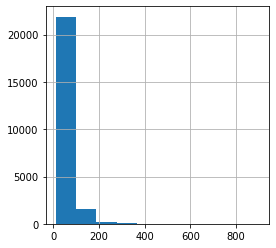

In [ ]:
data['total_area'].hist(figsize=(4, 4))
plt.show()


Максимальное значение в столбце площади квартиры - 900 кв.м. Наиболее вероятно, это выбивающееся значение.
    Предположим, что для нашего исследования не нужны квартиры более 300 кв.м.
    Для начала посчитаем количество таких квартир:


In [ ]:
print(data.loc[data['total_area']>300, 'total_area'].count())

61



Всего 61 квартира имеют площадь более 300 кв.м.
Удалим строки с такими значениями общей площади, чтобы не было сильного влияния на наше исследование


In [ ]:
data = data.loc[data['total_area']<=300] # перезапишем датафрейм без выбивающихся значений
print(data.loc[data['total_area']>300, 'total_area'].count()) # посчитаем результат

0


Исследуем данные в столбце parks_nearest

In [ ]:
data['parks_nearest'].agg(['min','max','mean','median'])

min          1.000000
max       3190.000000
mean       490.980102
median     455.000000
Name: parks_nearest, dtype: float64

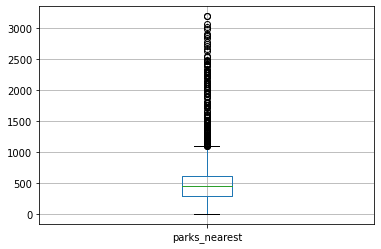

In [ ]:
data.boxplot(column='parks_nearest') # построим ящик с усами
plt.show()

Исходя из обзора, можно сделать вывод, что проблем с данными нет. Стоит только обратить внимание на том,  что в данном столбце большое количество отсутствующих значений. Такое количество отсутствующих значений по приближённости парка говорят о том, что необходимо проверить наличие проблемы в выгрузке данных из программы. 

Предположим, что в столбце ponds_nearest аналогичная ситуация
<br> Выведем информацию и построим гистограмму </br>

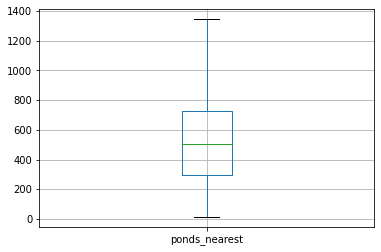

In [ ]:
data.boxplot(column='ponds_nearest') # построим ящик с усами
plt.show()

In [ ]:
data['parks_nearest'].agg(['min','max','mean','median'])

min          1.000000
max       3190.000000
mean       490.980102
median     455.000000
Name: parks_nearest, dtype: float64

Как и предполагалось, проблем с предоставленными данными нет, за исключением большого количества пропущенных значений.

Проверим столбец kitchen_area

Исходя из данных Строительных норм и правил, кухня не может быть менее площадью менее 5 квадратных метров. Выполним выборку по данным значениям:

In [ ]:
print(data.query('(kitchen_area < 5) & (kitchen_area > 0)')) # сделаем срез по условиям от 0 до 5 кв.м.

       total_images  last_price  total_area first_day_exposition  rooms  \
76               12   2800000.0        55.1           2016-05-14      3   
298               9   2650000.0        42.8           2017-04-25      2   
422               8   1700000.0        55.2           2018-03-24      3   
906              15   2600000.0        27.0           2017-07-10      1   
1327              6   2650000.0        46.2           2016-12-01      2   
...             ...         ...         ...                  ...    ...   
22839            14   3350000.0        27.0           2018-11-03      1   
22849             6   2380000.0        25.0           2016-03-22      1   
23110             1   2900000.0        34.0           2018-02-01      2   
23498             7   1600000.0        54.0           2016-12-26      2   
23678            10   3500000.0        43.0           2016-05-19      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
76               2.60


Всего 22 строки с выбивающимися значениями площади кухни.
    Исключим строки с аномальными значениями.


In [ ]:
data = data.loc[(data['kitchen_area']>=5) | (data['kitchen_area']==0)] # перезапишем датафрейм без выбивающихся значений
print(data.loc[(data['kitchen_area']<5) & (data['kitchen_area']>0), 'kitchen_area'].count()) # посчитаем результат

0


Выведем описание столбца first_day_exposition

In [ ]:
data['first_day_exposition'].agg(['min', 'max', 'median'])

min      2014-11-27
max      2019-05-03
median   2017-12-12
Name: first_day_exposition, dtype: datetime64[ns]

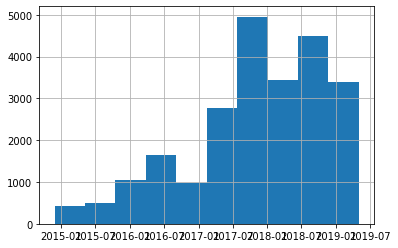

In [ ]:
data['first_day_exposition'].hist() # построим гистограмму
plt.show()

С данными в этом столбце всё в порядке

Проанализируем столбец ceiling_height

In [ ]:
data['ceiling_height'].describe() # выведем общую информацию о столбце

count    23638.000000
mean         2.723111
std          0.988698
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Максимальное значения высоты потолка 100 метров. Очевидно, это аномальное значение. Необходимо проверить наличие других.

In [ ]:
data.query('ceiling_height >= 20').head(10) # выведем все строки с высотой потолков выше 20 метров

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,8.5,2,гатчина,NaN,NaN,<NA>,NaN,<NA>,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,...,8.0,0,волхов,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,False,...,7.0,1,санкт-петербург,12016.0,13256.0,1,658.0,1,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,...,8.5,2,мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,5.5,0,санкт-петербург,29686.0,8389.0,3,397.0,1,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,...,9.0,2,мины,NaN,NaN,<NA>,NaN,<NA>,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,False,...,7.0,2,санкт-петербург,28981.0,10912.0,1,305.0,0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,...,12.0,5,санкт-петербург,18732.0,20444.0,0,NaN,3,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,False,...,5.7,0,кронштадт,68923.0,50649.0,1,417.0,2,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,False,...,5.2,0,санкт-петербург,11647.0,13581.0,0,NaN,0,NaN,NaN


Указаны высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м
<br> Произведем замену значений </br>

In [ ]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'].unique() # выведем уникальные значения

array([ 25. ,  32. ,  27. ,  24. ,  26. ,  20. ,  22.6,  27.5, 100. ])


Разделим значения больше или равно 20 на 10



In [ ]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] /= 10

In [ ]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'].unique() # снова выведем на экран уникальные значения

array([], dtype=float64)

Новый список пуст. Соответственно, все аномальные значения заменены.
<br> Т.к. потолок не может быть ниже 2 метров. Выведем уникальные значения из срезов: </br>
<br> - менее 2 метров </br>
<br> - от 11 до 20 метров </br>

In [ ]:
data.loc[((data['ceiling_height'] < 20) & (data['ceiling_height'] > 11)) 
         | (data['ceiling_height'] < 2) , 'ceiling_height'].unique()

array([ 1.2 , 14.  ,  1.75,  1.  ])

Заменим данные аномалии средним значением по столбцу.

In [ ]:
height_mid = data.query('ceiling_height > 2 and ceiling_height < 11')['ceiling_height'].median()
data.loc[((data['ceiling_height'] < 20) & (data['ceiling_height'] > 11)) 
         | (data['ceiling_height'] < 2) , 'ceiling_height'] = height_mid

In [ ]:
data.loc[((data['ceiling_height'] < 20) & (data['ceiling_height'] > 11))  # снова выведем на экран уникальные значения
         | (data['ceiling_height'] < 2) , 'ceiling_height'].unique()

array([], dtype=float64)


Рассмотрим аномальные значения в столбце last_price


In [ ]:
data['last_price'].describe() # опишем значения столбца

count    2.363800e+04
mean     6.306195e+06
std      7.770379e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.620000e+06
75%      6.750000e+06
max      3.300000e+08
Name: last_price, dtype: float64

Выведем строки с максимальным и минимальным значением 

In [ ]:
print(data['last_price'].max())

330000000.0


In [ ]:
print(data['last_price'].min())

12190.0


Наблюдаем аномально дешевую цену на квартиру и аномально дорогую. Проверим в каких значениях указана цена (вероятно, это тыс. руб). Посчитаем количество значений менее 500 000 и более 10 000 

In [ ]:
print(data.loc[(data['last_price']>10000)& (data['last_price']<500000), 'last_price'].count())

14


 Всего 14 значений дешевле 500 000 руб. Гипотеза не подтвердилась. Значения указаны корректно. Предположим, что, несмотря  на наличие в данных деревень, цена на квартиры не может быть ниже 500 000 рублей. Удалим выбивающиеся значения 

In [ ]:
data = data.loc[data['last_price']>=500000] # удалим строки с аномальными значениями
print(data.loc[data['last_price']<500000, 'last_price'].count()) # снова посчитаем количество

0


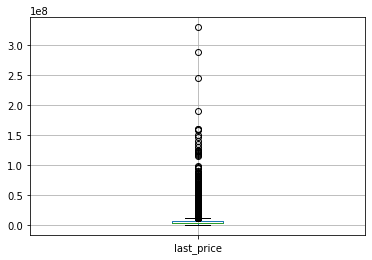

In [ ]:
data.boxplot(column='last_price') # построим ящик с усами
plt.show()

исходя из диаграммы, можно предположить, что цены выше 20 млн руб можно не учитывать. Т.к. сильно большой разброс в значениях

In [ ]:
data = data.loc[data['last_price']<=20000000] # удалим строки более 20 млн
print(data.loc[data['last_price']>20000000, 'last_price'].count()) # снова посчитаем количество

0


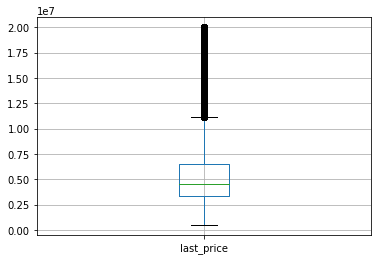

In [ ]:
data.boxplot(column='last_price') # построим ящик с усами
plt.show()

Основной разброс данных в диапазоне между 800 000 и 11 000 000 руб 


Рассмотрим аномальные значения в столбце rooms


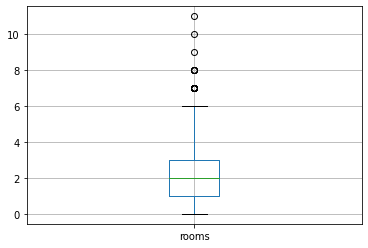

In [ ]:
data.boxplot(column='rooms') # построим ящик с усами
plt.show()

In [ ]:
data['rooms'].describe()

count    22975.000000
mean         2.010272
std          0.984727
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64


Выведем строки с 8 - 11 комнатами


In [ ]:
print(data.loc[(data['rooms']>=8) & (data['rooms']<=11)])

       total_images  last_price  total_area first_day_exposition  rooms  \
648               3  17500000.0       183.7           2018-07-01     11   
813               7  16500000.0       229.0           2016-02-25      8   
8758              5  16100000.0       150.0           2018-07-10      8   
8860             12  17000000.0       235.0           2018-07-14      9   
12447             8  19900000.0       210.3           2016-04-18      8   
18119             4  15500000.0       216.1           2016-07-04     10   
18945             4  15800000.0       236.4           2015-02-19      8   
20788             7  18000000.0       245.0           2017-04-06      8   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
648              3.40             7        138.8      7         False  ...   
813              2.65             6        160.0      5         False  ...   
8758             2.92             5        107.0      1         False  ...   
8860        


Исходя из данных, аномалий в количестве комнат не наблюдается.



Рассмотрим аномалии в столбце floors_total


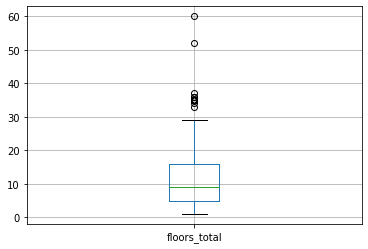

In [ ]:
data.boxplot(column='floors_total') # построим ящик с усами
plt.show()


В Санкт-Петербурге нет жилого дома выше 37 этажей, согласно статистике. 
Выведем количество строк с данными значениями


In [ ]:
print(data.loc[data['floors_total']>=37, 'floors_total'].count())

3



Всего 3, их можно исключить


In [ ]:
data = data.loc[data['floors_total']<37]


Проверим аномальные значения столбца floor
Выведем строки, где floor > floors_total


In [ ]:
print(data['floor'].unique())

[ 8  1  4 13  5  6 22 26  7  3  2 11 15  9 18 10 19 16 20 27 17 14 12 28
 24 21 25 23 30 29 32 33 31]


In [ ]:
print(data.loc[(data['floor'])>(data['floors_total'])])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, city_centers_nearest, parks_around, parks_nearest, ponds_around, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


Таких значений нет

#### Вывод:

Исходя из проведенный предобработки данных, можно сказать, что большая доля данных в выборке была утеряна при выгрузке, либо отсутствовала изначально. Наибольшее количество пропусков в тех столбцах, где заполнение информации происходило картографически. Необходимо сообщить ответственным сотрудникам по выгрузке и сбору данных. 
<br> Проведена оценка неявных и явных дубликатов. Явных дубликатов в таблице не оказалось. Неявные были связаны исключительно с столбцом, в котором были указаны названия населенных пунктов. Где необходимо - произведена замена значений.</br>
<br> Оценены аномальные значения в столбцах, проведено соответствующее изменение. </br>


### Добавьте в таблицу новые столбцы 

#### Добавление в таблицу цены квадратного метра

In [ ]:
data['price_per_meter'] = data['last_price']/data['total_area'] # добавим столбец цена за кв.м.
data['price_per_meter'].head(5) # выведем на экран 5 значений

0    120370.370370
1     82920.792079
2     92785.714286
4    100000.000000
5     95065.789474
Name: price_per_meter, dtype: float64

In [ ]:
data['price_per_meter'].mean().round(0) # посчитаем среднее значение и округлим

94879.0

Средняя цена за квадратный метр жилья составляет приблизительно 100 тыс рублей

#### Добавление в таблицу дня недели, месяца и года публикации объявления

In [ ]:
data['day_of_exposition'] = data['first_day_exposition'].dt.weekday # добавление дня недели в столбец day_of exposition

In [ ]:
data['month_of_exposition'] = data['first_day_exposition'].dt.month # добавление месяца в столбец month_of_exposition

In [ ]:
data['years_of_exposition']=data['first_day_exposition'].dt.year # добавление года в столбец years_of_exposition

Проверим результат

In [ ]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_meter,day_of_exposition,month_of_exposition,years_of_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,NaN,0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,NaN,<NA>,NaN,<NA>,NaN,55.0,95065.789474,0,9,2018


Новые столбцы успешно добавлены. Формат соблюден

#### Добавление типа этажа квартиры

Необходимо добавить  типы этажей квартир (первый, последний, другой)

In [ ]:
data.loc[data['floor'] == 1, 'types_floors'] = 'Первый' # добавим значения в новый столбец types_floors по условиям
data.loc[data['floor'] == data['floors_total'], 'types_floors'] = 'Последний'
data.loc[(data['floor'] != 1) & (data['floor'] != data['floors_total']), 'types_floors'] = 'Другой'

Выведем на экран получившийся датафрейм

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_meter,day_of_exposition,month_of_exposition,years_of_exposition,types_floors
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,Другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,NaN,0,NaN,81.0,82920.792079,1,12,2018,Первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,Другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,Другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,<NA>,NaN,<NA>,NaN,55.0,95065.789474,0,9,2018,Другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0,NaN,0,NaN,155.0,99195.710456,3,11,2017,Другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.50,22,False,...,0,NaN,0,NaN,NaN,110544.692737,3,4,2019,Другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,<NA>,NaN,<NA>,NaN,189.0,87454.764777,2,5,2018,Другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,0,NaN,289.0,88524.590164,6,2,2017,Другой
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,1,310.0,2,553.0,137.0,127525.252525,3,11,2017,Другой


In [ ]:
data['types_floors'].value_counts()

Другой       16832
Последний     3211
Первый        2845
Name: types_floors, dtype: int64

Наиболее популярными предложениями являются квартиры на любых других этажах, кроме первого или последнего

#### Добавление столбца с расчетом расстояния от центра города в км

In [ ]:
data['city_centers_nearest_km'] = (data['city_centers_nearest']/1000).round(0) # добавляем новый столбец и считаем расстояние
data['city_centers_nearest'].astype('Int64') # переводим новый столбец в тип целочисленный
data[['city_centers_nearest_km', 'city_centers_nearest']].head(5) # выводим 5  значений на экран

,city_centers_nearest_km,city_centers_nearest
0,16.0,16028.0
1,19.0,18603.0
2,14.0,13933.0
4,8.0,8098.0
5,NaN,NaN


В новом столбце округлили значения расстояния в бОльшую сторону.
<br> Оценим количество предложений по расстоянию от центра </br>

In [ ]:
data['city_centers_nearest_km'].value_counts().head(10)

12.0    1589
15.0    1547
13.0    1439
14.0    1272
16.0    1259
11.0    1156
17.0     901
5.0      781
10.0     703
4.0      623
Name: city_centers_nearest_km, dtype: int64

Больше всего предложений от локаций в пределах 11 - 16 километров

#### Вывод:

Исходя из значений в добавленных столбцах и проведенного анализа, можно сделать вывод, что набольшее количество предложений на любом другом отличном от первого и последнего этажа дома.
<br> Предложения, в основном, в отдаленных от центра районах (вероятно, спальных районах).  На расстоянии от 11 до 16 км. </br>
<br> Средняя цена за кв.м. по информации из нового столбца составляет в районе 100 000 рублей </br>
<br> Для определения общего вывода исследования, необходима дополнительная аналитика </br>

### Исследовательский анализ данных

Изучим следующие показатели: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления.

#### Изучение параметров объектов

Посмотрим гистограмму для показателя "общая площадь"

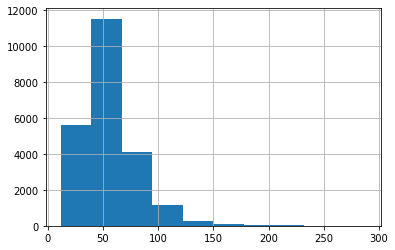

In [ ]:
data['total_area'].hist()
plt.show()

На гистограмме видно, что абсолютное большинство квартир в датафрейме имеют площадь не более 100 кв.м.

Построим гистограмму для наглядного распределения площадей квартир до 100 кв.м. 

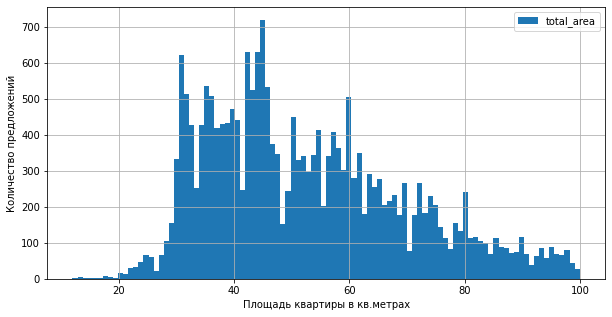

In [ ]:
data_good = data.query('total_area < 100') # создадим новый датафрейм с значениями total_area меньше 100
# построим гистограмму
data_good.sort_values(by='total_area', ascending=True).plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(10,5))
plt.xlabel('Площадь квартиры в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

Исходя из гистограммы видно, что больше всего квартир с площадями ~30 кв.м., ~45 кв.м. и 60 кв.м.

Посмотрим гистограмму для показателя "жилая площадь"

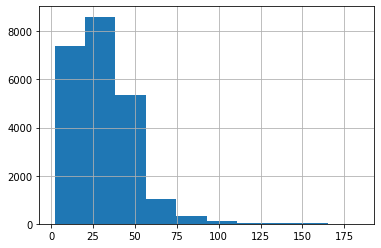

In [ ]:
data['living_area'].hist()
plt.show()

Абсолютное большинство квартир имеют жилую площадь до ~40  кв.м. Где-то четверть квартир имеют площадь от 40 до 75 кв.м. 
<br> Построим гистограмму с распределением жилых площадей квартир до 80 кв.м. </br>

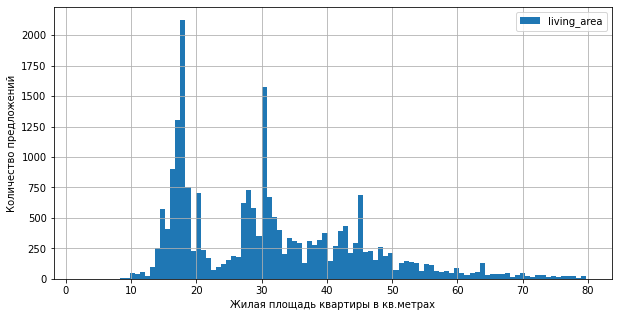

In [ ]:
data_good = data.query('living_area < 80') # создадим новый датафрейм с значениями  меньше 80
# построим гистограмму
data_good.sort_values(by='living_area', ascending=True).plot(y='living_area', kind='hist', bins=100, grid=True, figsize=(10,5))
plt.xlabel('Жилая площадь квартиры в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

Большинство предложений имеют жилую площадь квартир в райлне 18 кв.м и 30 кв.м

Построим гистограмму для показателя "площадь кухни"

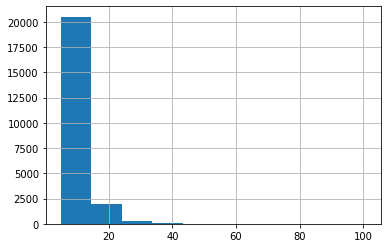

In [ ]:
data['kitchen_area'].hist()
plt.show()

Большинство квартир имеют площадь кухни до ~13 кв.м.

Построим гистограмму для предложений до 15 кв.м.

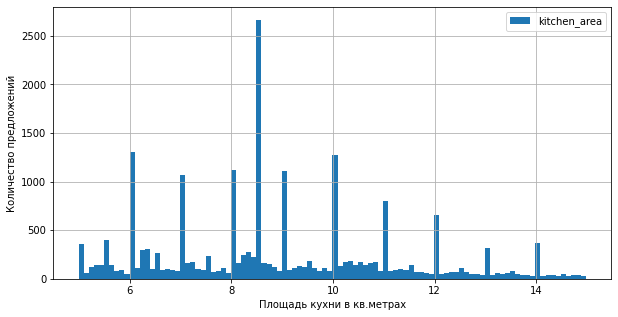

In [ ]:
data_good = data.query('kitchen_area < 15') # создадим новый датафрейм с значениями  меньше 15
# построим гистограмму
data_good.sort_values(by='kitchen_area', ascending=True).plot(y='kitchen_area', kind='hist', bins=100, grid=True, figsize=(10,5))
plt.xlabel('Площадь кухни в кв.метрах')
plt.ylabel('Количество предложений')
plt.show()

Исходя из гистограммы видно, что больше 2,5 тысяч предложений имеют площадь кухни 8,5 кв.м. 
<br> Далее, по 1250 предложений квартир с площадями 6 кв.м., 10 кв.м. </br>
<br> В районе 1000 предложений квартир с площадями 7 кв.м, 9 кв.м. </br> и т.д.

Рассмотрим предложения в зависимости от цены объекта

Построим диаграмму размаха

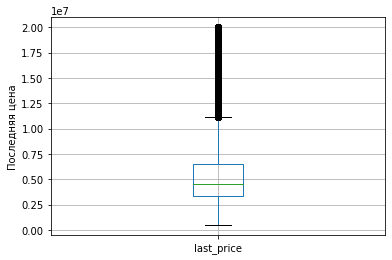

In [ ]:
data.boxplot('last_price')
plt.ylabel('Последняя цена')
plt.show()

Довольно большой разброс по цене между самым дешевым предложением и самым дорогим. 
<br> Выведем распределение цены у предложений до 10 млн </br> т.к. судя по диаграмме, большинство предложений по этой цене

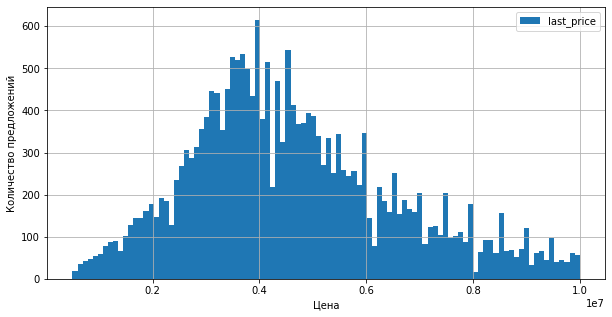

In [ ]:
data_good = data.query('last_price < 10000000') # создадим новый датафрейм с значениями  меньше 10 млн
# построим гистограмму
data_good.sort_values(by='last_price', ascending=True).plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(10,5))
plt.xlabel('Цена')
plt.ylabel('Количество предложений')
plt.show()

Исходя из гистограммы, видно, что более 600 предложений по цене в районе 4 млн рублей. Это пиковое значение. Тренд у уменьшения и у увеличения от данной цены понижательный.
<br> Далее в районе 540 предложений по ценам - от 3.5 млн до 3,7 млн, в районе 4,5 млн. руб </br>  

Далее, рассмотрим показатель "количество комнат"

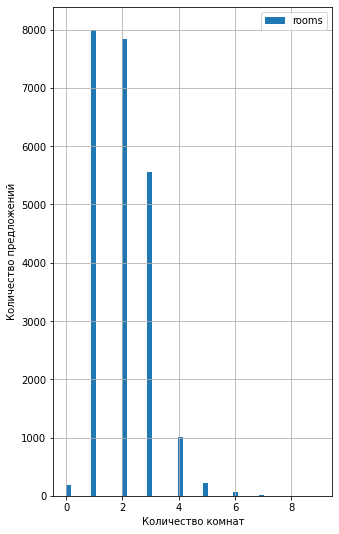

In [ ]:
good_data = data.query('rooms < 10') # рассмотрим предложения с менее 10 комнатами
good_data.plot(kind='hist',y='rooms',grid=True, bins=50, figsize=(5,9))
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
plt.show()

Из гистограммы видно, что большинство предложений однокомнатные и двухкомнатные квартиры. Далее, следуют 3х комнатные квартиры

Рассмотрим высоту потолков 
<br> Построим диаграмму размаха </br>

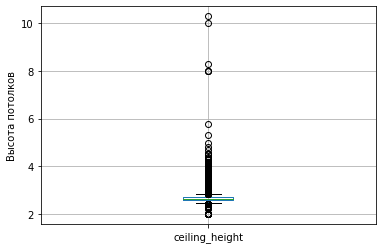

In [ ]:
data.boxplot('ceiling_height')
plt.ylabel('Высота потолков')
plt.show()

По диаграмме видно, что основное количество предложений находится в диапазано от 2,5 до 3 метров
<br> Построим гистограмму </br>

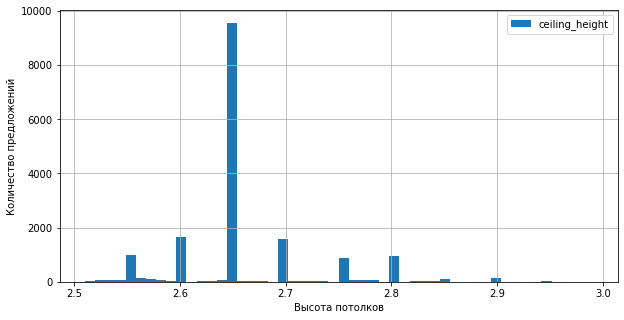

In [ ]:
good_data = data.query(('ceiling_height >  2.5 and ceiling_height < 3')) # рассмотрим предложения менее 3 метров и более 2,5 м
good_data.plot(kind='hist',y='ceiling_height',grid=True, bins=50, figsize=(10,5))
plt.xlabel('Высота потолков')
plt.ylabel('Количество предложений')
plt.show()

Пиковое значение количества предложений (10000) у квартир с высотой потолков 2,65 метров. Это вызвано тем, что в исходном датафрейме в данном столбце было большое количество пропущенных значений, соответственно, они были заполнены медианой 2,65 метров. 

Рассмотрим показатель этаж квартиры

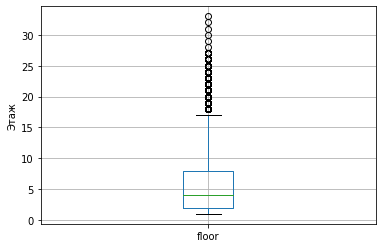

In [ ]:
data.boxplot('floor') # построим диаграмму размаха
plt.ylabel('Этаж')
plt.show()

Видно, что в основном предложения со 2 по 17 этаж

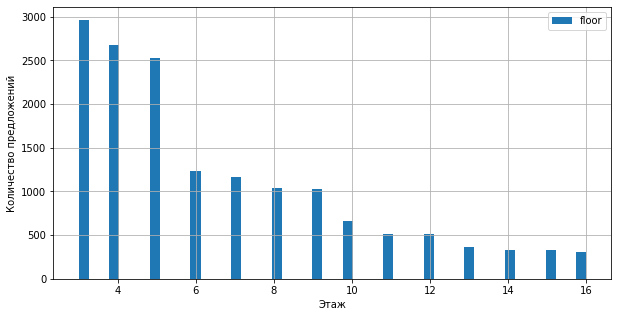

In [ ]:
good_data = data.query(('floor >  2 and floor < 17')) # рассмотрим предложения с 2 по 17 этаж
good_data.plot(kind='hist',y='floor',grid=True, bins=50, figsize=(10,5))
plt.xlabel('Этаж')
plt.ylabel('Количество предложений')
plt.show()

Больше всего (в районе 3100) предложений квартир на 2 этаже. Далее идет 4 этаж с ~2800  предложениями. ~2200 предложений на 5 этаже. 
<br> Затем следует резкое падение количества предложений: ~1250 на 6 этаже и т.д.</br>
<br> В целом, тренд понижательный </br>

Рассмотрим показатель "тип этажа квартиры"

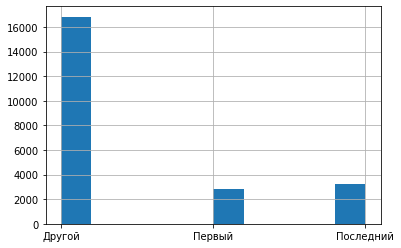

In [ ]:
data['types_floors'].hist()
plt.show()

Как уже было сказано ранее, абсолютное большинство квартир (в районе 17500) имеют другой, отличный от первого и последнего этажа в доме. 
<br> На первом и последнем этаже приблизительно одинаковое количество предложений (3361, 2892 соответственно)</br>

Рассмотрим общее количество этажей в доме

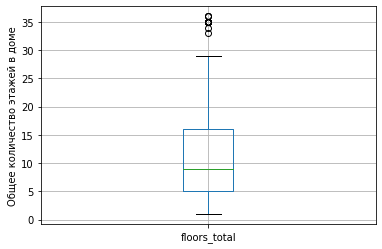

In [ ]:
data.boxplot('floors_total') # построим диаграмму размаха
plt.ylabel('Общее количество этажей в доме')
plt.show()

Большинство предложений - дома, у которых с 1 по 29 этажей. Медиана - 9 этажей
<br> Построим гистограмму </br>

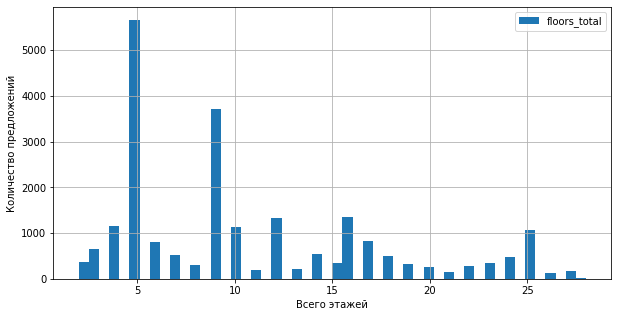

In [ ]:
good_data = data.query(('floors_total > 1 and floors_total < 29')) # рассмотрим предложения от 1 до 29
good_data.plot(kind='hist',y='floors_total',grid=True, bins=50, figsize=(10,5))
plt.xlabel('Всего этажей')
plt.ylabel('Количество предложений')
plt.show()

Наибольшее количество предложений в 5 этажных домах. Приблизительно 5700 предложений. Далее, идут 9 этажные дома с ~3900 предложениями
<br> ~1100 предложений в 10 этажных домах </br>
<br> ~1200 предложений в 12 этажных домах и в 16 этажных домах </br>
<br> ~1000 предложений в 25 этажных домах </br>

Рассмотрим показатель расстояния до центра города в метрах

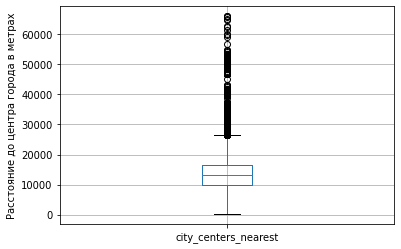

In [ ]:
data.boxplot('city_centers_nearest') # построим диаграмму размаха
plt.ylabel('Расстояние до центра города в метрах')
plt.show()

Большинство предложений  с расстоянием от 0 до ~28000 метров

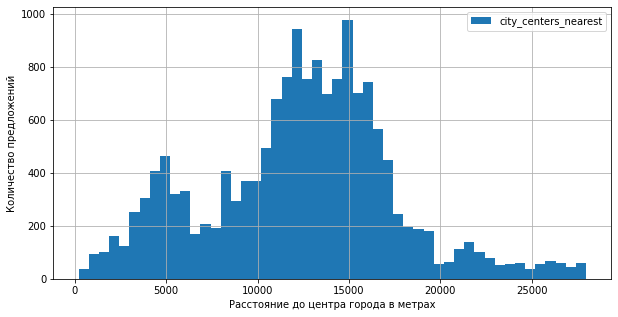

In [ ]:
good_data = data.query(('city_centers_nearest > 0 and city_centers_nearest < 28000')) # рассмотрим предложения от 0 до 28000
good_data.plot(kind='hist',y='city_centers_nearest',grid=True, bins=50, figsize=(10,5))
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество предложений')
plt.show()

В районе 1000 предложений с домами находящихся на расстоянии в 15 км от центра города
<br> В районе 900 предложений с домами находящихся на расстоянии в 12 км от центра города </br>
<br> В районе 810 предложений с домами находящихся на расстоянии в 13.5 км от центра города </br>
<br> В районе 680 предложений с домами находящихся на расстоянии в 16 км от центра города </br>

Рассмотрим показатель расстояния до ближайшего аэропорта

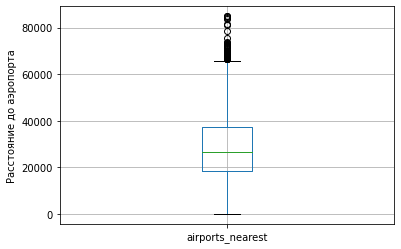

In [ ]:
data.boxplot('airports_nearest') # построим диаграмму размаха
plt.ylabel('Расстояние до аэропорта')
plt.show()

Большинство предложений в пределах от 0 до 62 км. (Можно предположить, что значение 0 означает, что нет данных о расстоянии до ближайшего аэропорта)
<br> Таким образом, будем учитывать срез от 1 до 62 км при построении гистограммы

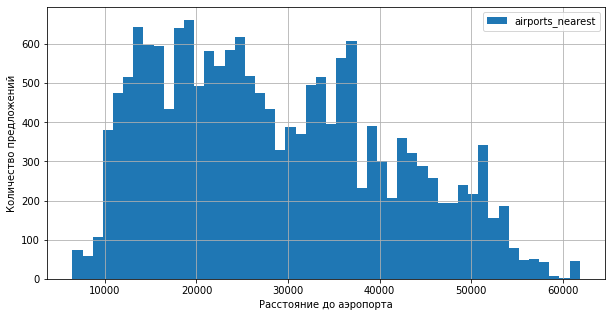

In [ ]:
good_data = data.query(('airports_nearest > 1 and airports_nearest < 62000')) # рассмотрим предложения от 1 до 62000
good_data.plot(kind='hist',y='airports_nearest',grid=True, bins=50, figsize=(10,5))
plt.xlabel('Расстояние до аэропорта')
plt.ylabel('Количество предложений')
plt.show()

В районе 700 предложений на расстоянии в ~25 км от ближайшего аэропорта.
<br>Далее, в районе 690 предложений на расстоянии в ~19 км от ближайшего аэропорта </br>
<br> Далее,  в райне 650 предложений на расстоянии в ~13 км от ближайшего аэропорта </br>
<br> В целом,  можно сделать вывод, что разброс данных более-менее равномерен </br>

Рассмотрим показатель расстояния до ближайшего парка

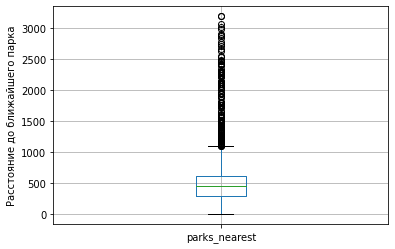

In [ ]:
data.boxplot('parks_nearest') # построим диаграмму размаха
plt.ylabel('Расстояние до ближайшего парка')
plt.show()

В основном дома расположились на расстоянии от 0 до 1100 метров до ближайшего парка. (0 - вероятно обозначает отсутствие данных для этого предложения). Будем рассматривать срез от 1 до 1100 метров

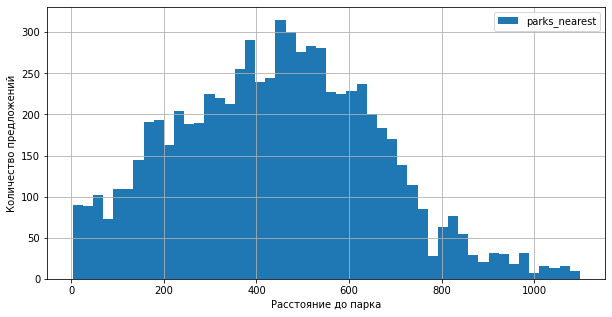

In [ ]:
good_data = data.query(('parks_nearest > 1 and parks_nearest < 1100')) # рассмотрим предложения от 1 до 1100
good_data.plot(kind='hist',y='parks_nearest',grid=True, bins=50, figsize=(10,5))
plt.xlabel('Расстояние до парка')
plt.ylabel('Количество предложений')
plt.show()

Наблюдается небольшой разброс между предложениями. 
<br> Пиковое значение - 350 квартир на расстоянии в ~420 метров от ближайшего парка. Далее, идет показатель ~430 метров с 340  предложениями. В районе 310 предложений на расстоянияя ~390 метров и ~460 метров. 
<br> 90 квартир находят в непосредственной близости к парку (до 10 метров) </br>

Рассмотрим последние показатели: день и месяц публикаций объявлений

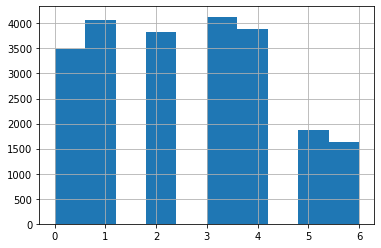

In [ ]:
data['day_of_exposition'].hist() # построим гистограмму по столбцу day_of_exposition
plt.show()

Большинство  предложений (в районе 8200) размещены в понедельник и четверг пополам.
<br> По 4000 предложений размещены в среду и пятницу </br>
<br> В понедельник размещено в районе 3500 объявлений </br>
<br> Меньше всего размещаются объявления по выходным </br>

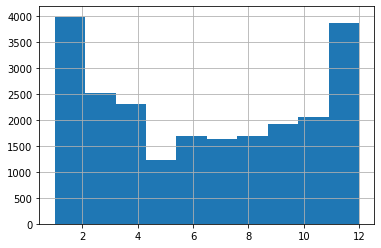

In [ ]:
data['month_of_exposition'].hist() # построим гистограмму по столбцу month_of_exposition
plt.show()

Большинство объявлений размещаются в зимние месяцы (декабрь, январь, февраль). В районе 8000 объявлений. 
<br> Меньше всего выкладывают объявления в апреле-мае </br>

#### Рассмотрение времени продажи квартиры. Построение гистограммы. Расчет средней и медианы

Построим диаграмму размаха по столбцу 'days_exposition'. Столбец показывает, сколько дней было размещено каждое объявление.

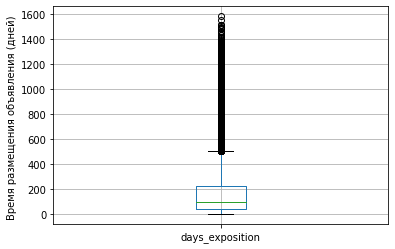

In [ ]:
data.boxplot('days_exposition')
plt.ylabel('Время размещения объявления (дней) ')
plt.show()

Основные значения расположены в диапазоне от 0 до 500 дней. Более 500 дней продажи необычно долгие. 

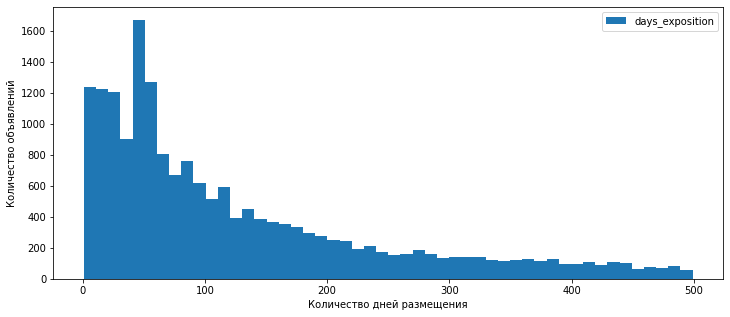

In [ ]:
good_data = data.query(('days_exposition > 0 and days_exposition < 500')) # рассмотрим предложения в диапазоне от 0 до 500 дней
good_data.plot(kind='hist',y='days_exposition', bins=50, figsize=(12,5))
plt.xlabel('Количество дней размещения')
plt.ylabel('Количество объявлений')
plt.show()

По гистограмме видно, что, большинство квартир продаётся в период ~50-60 дней от даты объявления. Очень быстрые продажи квартир до месяца
<br> Рассчитаем медиану и среднее значение </br>

In [ ]:
good_data['days_exposition'].agg(['mean','median'])

mean      126.014449
median     83.000000
Name: days_exposition, dtype: float64

<b>Вывод:</b>
<br>Учитывая квартиры, которые продаются достаточно долго, то, в среднем, продажа квартиры занимает от 2 - 3 месяца в зависимости от других параллельных факторов </br> 

#### Зависимость цены от общей площади

Проанализируем зависимость цены от общей площади квартиры (total_area)

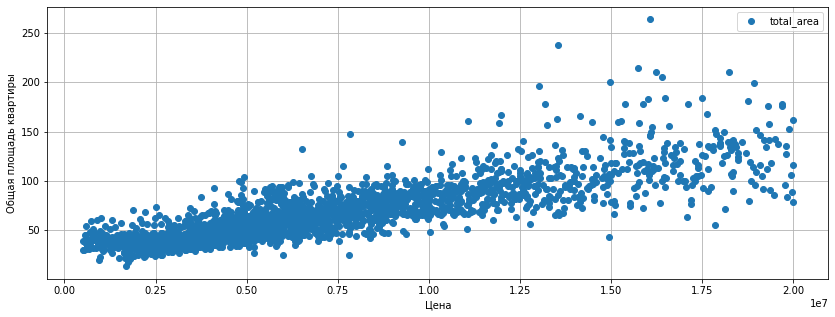

In [ ]:
(
    data.pivot_table(index='last_price', values=['total_area'])
    .plot(style='o',grid=True, figsize=(14,5))
)
plt.ylabel('Общая площадь квартиры')
plt.xlabel('Цена')
plt.show()

Исходя из графика, видно, что, в среднем, цена растет с ростом общей площади квартиры. 

Проанализируем зависимость цены от жилой площади квартиры (living_area)

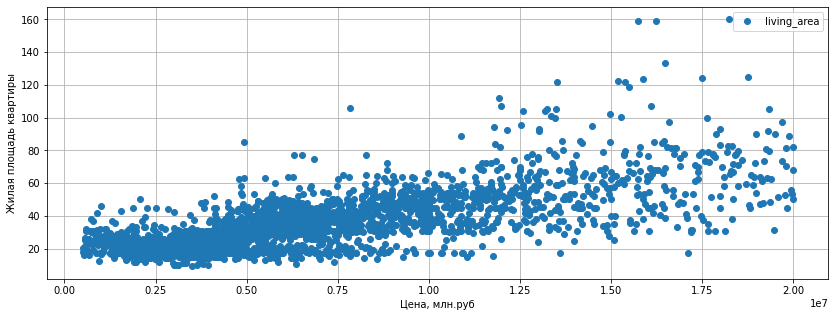

In [ ]:
(
    data.pivot_table(index='last_price', values=['living_area'])
    .plot(style='o',grid=True, figsize=(14,5))
)
plt.ylabel('Жилая площадь квартиры')
plt.xlabel('Цена, млн.руб')
plt.show()

Прямая зависимость между ростом цены и увеличением жилой площади не так существенна, нежели между ростом цены и увеличением общей площади.

Проанализируем зависимость цены от жилой площади кухни (kitchen_area)

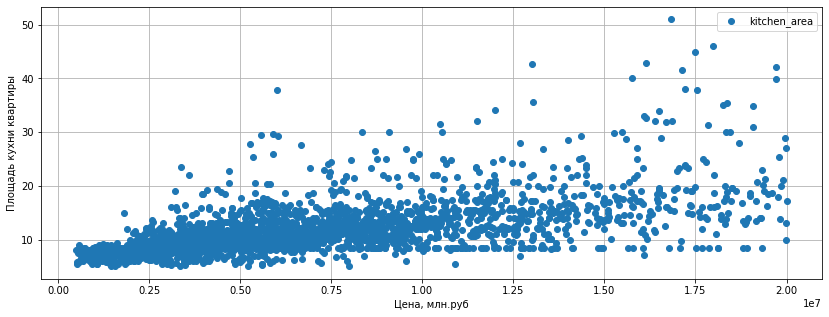

In [ ]:
(
    data.pivot_table(index='last_price', values=['kitchen_area'])
    .plot(style='o',grid=True, figsize=(14,5))
)
plt.ylabel('Площадь кухни квартиры')
plt.xlabel('Цена, млн.руб')
plt.show()

Также, наблюдается прямая зависимость между ростом площади кухни и ростом цены. 

Проанализируем зависимость цены от количества комнат (rooms)

График цены меняется не так значительно в зависимости от количества комнат

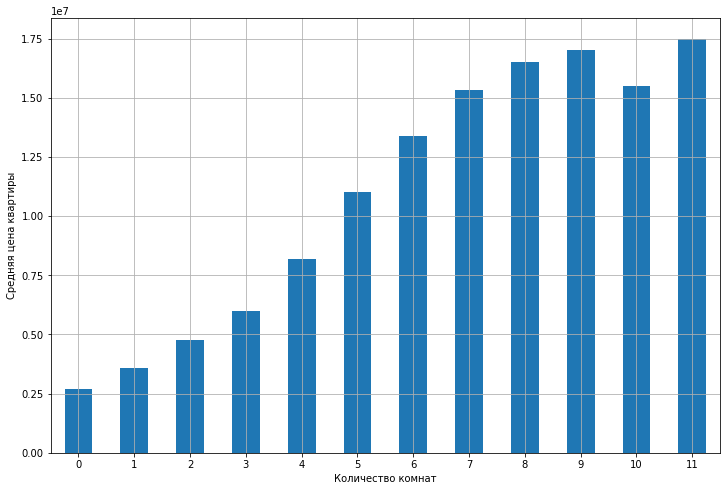

In [ ]:
data.groupby('rooms')['last_price'].median().plot(kind='bar', figsize=(12, 8), grid=True)

plt.xticks(rotation=0)
plt.xlabel('Количество комнат')
plt.ylabel('Средняя цена квартиры')

plt.show()


Средняя цена квартир растёт с количеством комнат. Наблюдается небольшой скачок цены в районе квартир с 10 комнатами. Но, это может объясняться зависимостью от других факторов - локация, площадь и т.д.

Проанализируем зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)

Исходя из графика, очевидно, что цены выше на любом другом этаже, нежели на первом или последнем.

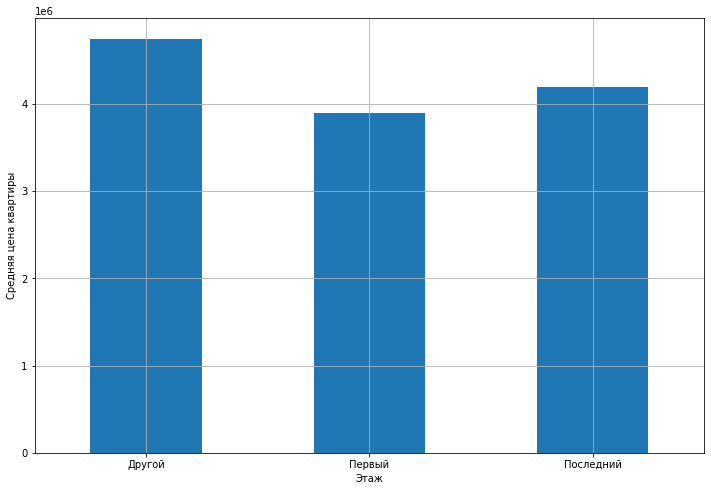

In [ ]:
data.groupby('types_floors')['last_price'].median().plot(kind='bar', figsize=(12, 8), grid=True)

plt.xticks(rotation=0)
plt.xlabel('Этаж')
plt.ylabel('Средняя цена квартиры')

plt.show()

Проанализируем зависимость цены от даты размещения (день недели, месяц, год).

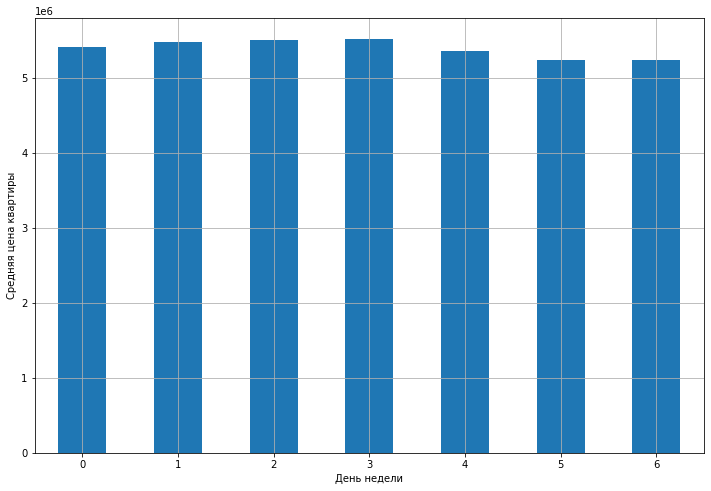

In [ ]:
data.groupby('day_of_exposition')['last_price'].mean().plot(kind='bar', figsize=(12, 8), grid=True)

plt.xticks(rotation=0)
plt.xlabel('День недели')
plt.ylabel('Средняя цена квартиры')

plt.show()

Исходя из графика, можно заметить, что цены ниже у тех предложений ,которые были размещены на выходных в субботу и в воскресенье. В целом изменение средней цены не сильно существенно в зависимости от дня недели

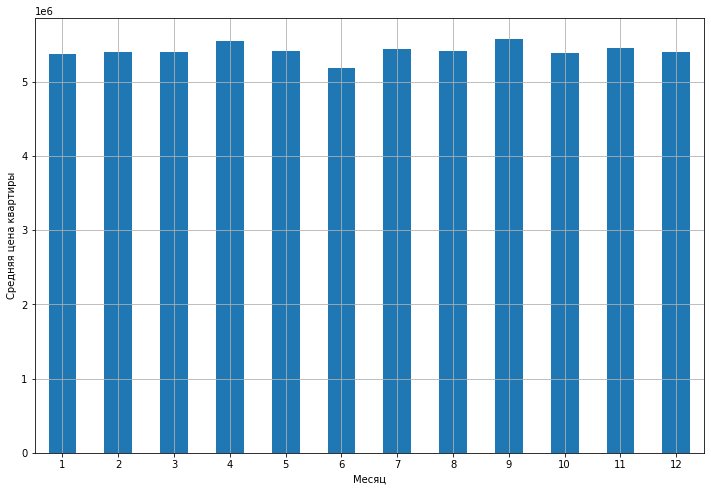

In [ ]:
data.groupby('month_of_exposition')['last_price'].mean().plot(kind='bar', figsize=(12, 8), grid=True)

plt.xticks(rotation=0)
plt.xlabel('Месяц')
plt.ylabel('Средняя цена квартиры')

plt.show()

Исходя из графика, самые высокие цены у тех предложений, которые были размещены в апреле и сентябре. Самые низкие цены на предложения, размещенные в июне. В остальные месяцы предложения в среднем приблизительно одинаковы по цене

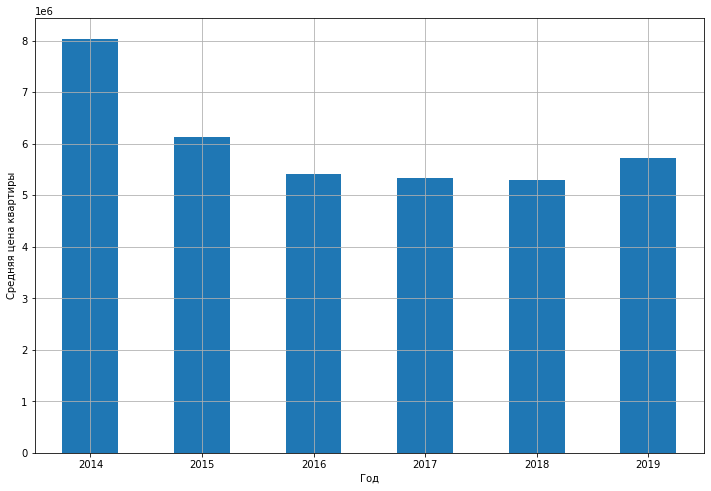

In [ ]:
data.groupby('years_of_exposition')['last_price'].mean().plot(kind='bar', figsize=(12, 8), grid=True)

plt.xticks(rotation=0)
plt.xlabel('Год')
plt.ylabel('Средняя цена квартиры')

plt.show()

Самые высокие цены у предложений размещенных в 2014 году. Затем, прослеживается падение до 2016 года. Цены держались этого уровня до 2018 года и начали расти.

<b> Вывод:</b>
<br> Наблюдается зависимость роста цены от увеличения общей и жилой площади квартир (хоть и жилая площадь меньше влияет на цену). Также, предложения, размещенные на выходных, имеют нижу цену, нежели предложения, размещенные по будням. Предложения, размещенные в середине года (июнь, июль) имеют самую низкую среднемесячную стоимость. Предложения, размещенные в апреле - самую высокую. В годовом диапазоне 2016-2018 квартиры  имели самую низкую среднюю цену за отчётный период с 2014 по 2019 года. </br>
<br> Несущественно влияние увеличения площади кухни и количества комнат на увеличение цены предложения </br>
<br> На любом другом, отличном от первого и второго этажа, выше цены на квартиры</br>

#### Расчёт средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

Сгруппируем 10 населенных пунктов 

In [ ]:
data_ten = data.pivot_table(index='locality_name', values='first_day_exposition', aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
print(data_ten)

                 first_day_exposition
locality_name                        
санкт-петербург                 14960
мурино                            586
кудрово                           470
шушары                            439
всеволожск                        397
пушкин                            360
колпино                           337
парголово                         327
гатчина                           307
выборг                            237


Больше всего объявлений в Санкт-Петербурге. 
<br> Рассчитаем для каждой группировки цену одного квадратного метра </br>

In [ ]:
data_ten['price_per_meter'] = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc='mean')
data_ten

,first_day_exposition,price_per_meter
locality_name,,
санкт-петербург,14960,108696.805296
мурино,586,86041.116064
кудрово,470,95260.846171
шушары,439,78551.344545
всеволожск,397,67214.252635
пушкин,360,101788.572053
колпино,337,75333.295801
парголово,327,90175.913458
гатчина,307,68746.146763


Исходя из данных, можно сделать вывод, что самая большая средняя цена за квадратный метр в Санкт-Петербурге - 115 тыс рублей.
Самая низкая стоимость в Выборге - 58 тысяч рублей за кв.м.

#### Расчет средней цены каждого километра расстояния до центра Санкт-Петербурга

Выведем на экран отсортированную по убыванию среднюю цену каждого километра расстояния до центра Санкт-Петербурга

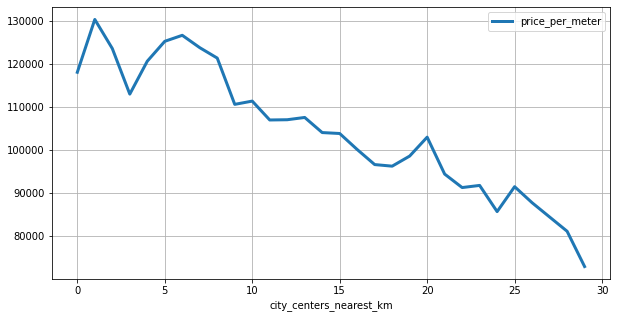

In [ ]:
data_saint = data.query('locality_name == "санкт-петербург"')
(
    data_saint.pivot_table(index='city_centers_nearest_km', values='price_per_meter', aggfunc='mean') # строим сводную таблицу
    .query('city_centers_nearest_km != 27') # не учитываем расстояние 27 км, т.к. стат выброс
    .plot(figsize=(10,5), grid=True,linewidth=3)
)
plt.show()


Исходя из графика, можно сделать вывод о том, что в среднем, чем ближе квартира до центра города, тем дороже её стоимость.

#### Вывод

Исходя из датасета, в среднем, продажа квартиры занимает 2-3 месяца от даты объявления. Общая, жилая площадь напрямую зависят на цену квартиры в предложении. Количество комнат, также, влияют на цену объекта, но не так значительно, как площадь. Квартиры на первом и последнем этаже имею ниже цену, чем какая-либо квартиры на любом другом этаже. 
<br>Предложения, размещенные в середине года имеют ниже стоимость, нежели предложения размещенные в марте-апреле.</br>
<br>В зависимости от экономических показателей, в т.ч. показателей спроса и предложения, в разные годы на одну и ту же квартиру можно встретить абсолютно разную цену.
<br>Самые дорогие квартиры с точки зрения цены за квадратный метр находятся в Санкт-Петербурге ( в среднем 115 тысяч за кв.м.)</br>
<br> Чем ближе к центру, тем дороже средняя цена за кв.м.</br>

### Общий вывод

Была поставлена задача провести исследование с использование данных из архива Яндекс Недвижимости. Необходимость заключалась в предобработке данных и нахождению интересных особенностей и зависимостей, которые существуют на рынке недвижимости Санкт-Петербурга и ближайших городов.
<br> Исходные данные представлены двумя типами: заполненные пользователем и картографические </br> 
<br> На первом этапе было обнаружено большое количество пропущенных значений, в первую очередь, тех данных, которые были заполнены картографически. </br>
<br> Была проведена предобработка данных для максимально возможного заполнения необходимых значений. 
<br> Проведена оценка неявных и явных дубликатов. Явных дубликатов в таблице не оказалось. Неявные были связаны исключительно с столбцом, в котором были указаны названия населенных пунктов. В основном, это чередование буквы "е" и "ё" - наиболее встречаемая ошибка. Но, встречались и другие дубликаты. Причина заключается в том, что один и тот же населенный пункт, можно называть по-разному. Например, "посёлок", "посёлок городского типа" и т.п. Были убраны типы населенных пунктов и оставлены только названия.</br>
<br>Оценены аномальные значения в столбцах, проведено соответствующее изменение. </br>
<br>Для наибольшей наглядности при анализе использовались графики и гистограммы. Было выявлено, что лидером по количеству и по цене предложений в регионе является город Санкт-Петербург. </br>
<br> В процессе исследования были рассмотрены факторы влияния общую стоимость объекта </br>
<br> Было выявлено, что чем больше общая и жилая площади квартир, тем больше и цена. Определена прямая зависимость. Также, было выявлено, что предложения,  размещенные по будням, имеют выше цену, нежели те квартиры, которые были выложены на выходных. С 2016 по 2018 годы на рынке недвижимости была самая низкая средняя цена за отчётный период. Предложения, размещенные в середине года (июнь, июль) имеют самую низкую среднемесячную стоимость. Предложения, размещенные в апреле - самую высокую.
Самые низкие цены на квартиры, расположенные на первом и последнем этажах здания. <br>
<br> Средняя цена за квадратный метр в Санкт-Петербурге - 115 тыс рублей. </br>
<br> Влияние отдаленности от центра на цену объектов прямопропорциональное. Чем дальше - тем дешевле </br>